### 1) Load the original landmarks & labels

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

X = np.load("../data/landmarks/X.npy")
y = np.load("../data/landmarks/y.npy")

print("Original shape X:", X.shape)
print("Original shape y:", y.shape)

Original shape X: (373, 60, 1662)
Original shape y: (373,)


### 2) Count occurrences

Original label counts:
Good_afternoon: 20
I: 20
Alright: 19
Good: 20
IT: 20
Beautiful: 13
Loud: 20
Good_morning: 20
Bad: 20
Quiet: 20
Deaf: 15
Ugly: 13
She: 20
He: 20
How_are_you: 20
Hello: 20
Sad: 13
happy: 20
Blind: 20
You: 20


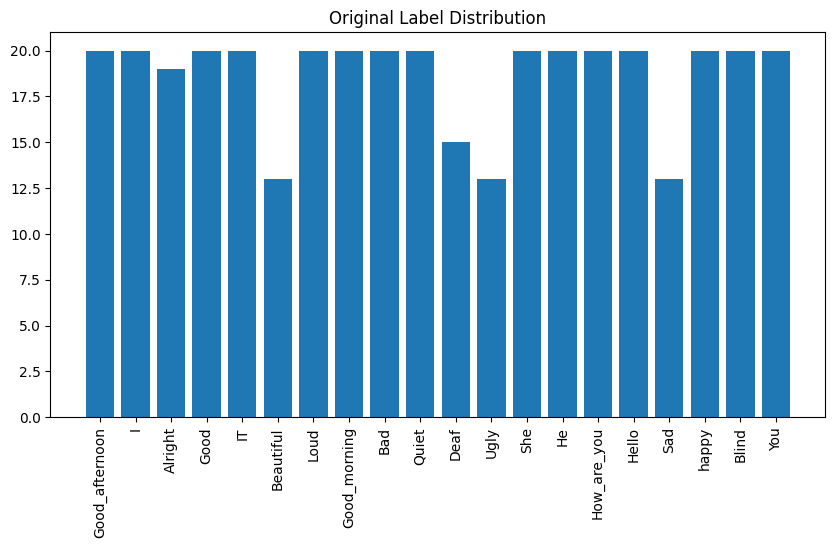

In [19]:
label_counts = Counter(y)
print("Original label counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

# Visualize
plt.figure(figsize=(10, 5))
plt.bar(label_counts.keys(), label_counts.values())
plt.xticks(rotation=90)
plt.title("Original Label Distribution")
plt.show()

### 3)Minimum desired count

In [20]:
TARGET = max(label_counts.values())  

print(f"Target samples per class: {TARGET}")

Target samples per class: 20


### 4) Balance dataset by oversampling

In [12]:
X_aug = []
y_aug = []

for label in label_counts.keys():
    # Filter this class
    X_class = X[y == label]
    count = label_counts[label]

    # Add originals
    X_aug.extend(X_class)
    y_aug.extend([label] * count)

    # If needed, duplicate
    while count < TARGET:
        needed = TARGET - count
        to_add = X_class[:needed] if needed <= len(X_class) else X_class
        X_aug.extend(to_add)
        y_aug.extend([label] * len(to_add))
        count += len(to_add)

print(f"Augmented length: {len(X_aug)}")

Augmented length: 400


### 5) Shuffle

In [13]:
X_aug = np.array(X_aug)
y_aug = np.array(y_aug)

# Shuffle indices
perm = np.random.permutation(len(X_aug))
X_aug = X_aug[perm]
y_aug = y_aug[perm]

print("New shape X:", X_aug.shape)
print("New shape y:", y_aug.shape)

New shape X: (400, 60, 543, 3)
New shape y: (400,)


### 6) Check new counts

New label counts:
Bad: 20
Sad: 20
Blind: 20
Good morning: 20
Alright: 20
happy: 20
Good afternoon: 20
How are you: 20
Quiet: 20
Good: 20
IT: 20
Deaf: 20
I: 20
Ugly: 20
Beautiful: 20
He: 20
She: 20
Hello: 20
Loud: 20
You: 20


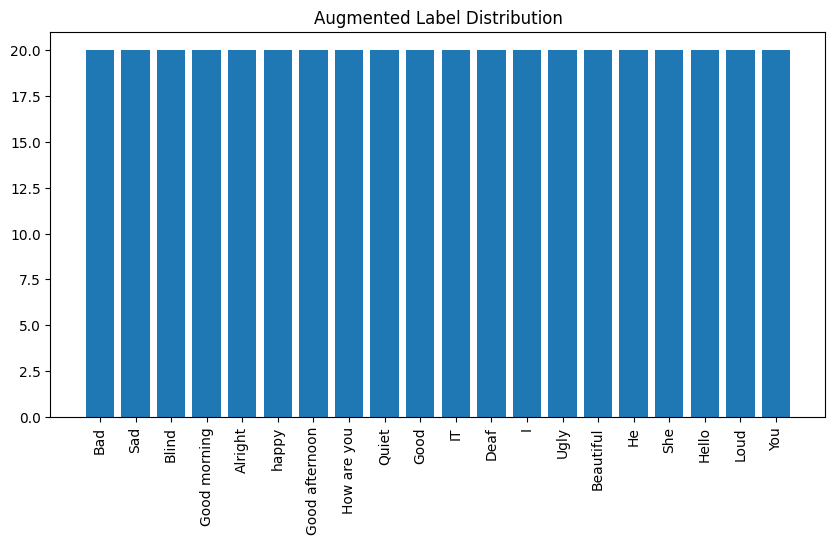

In [14]:
new_counts = Counter(y_aug)
print("New label counts:")
for label, count in new_counts.items():
    print(f"{label}: {count}")

plt.figure(figsize=(10, 5))
plt.bar(new_counts.keys(), new_counts.values())
plt.xticks(rotation=90)
plt.title("Augmented Label Distribution")
plt.show()

### 7)Save

In [15]:
np.save("../data/landmarks/X_balanced.npy", X_aug)
np.save("../data/landmarks/y_balanced.npy", y_aug)

print("Balanced dataset saved")

Balanced dataset saved
